In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [37]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=3,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

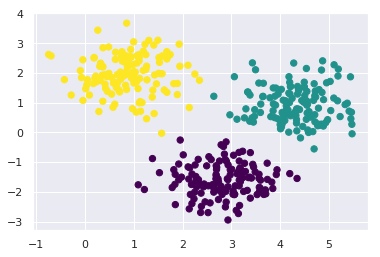

In [38]:


from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')



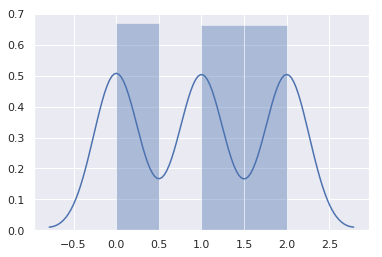

In [22]:
sns.distplot(y_true);


In [31]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariance, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


AttributeError: 'GaussianMixture' object has no attribute 'covariance'

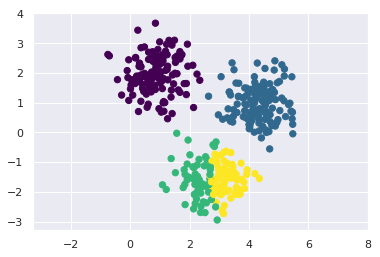

In [32]:


gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)



Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

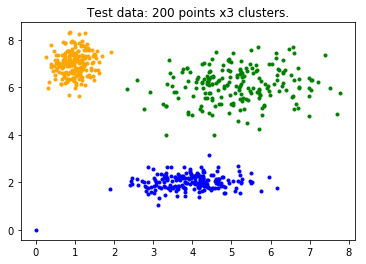

In [2]:


from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

In [11]:
alldata.shape

(2, 601)

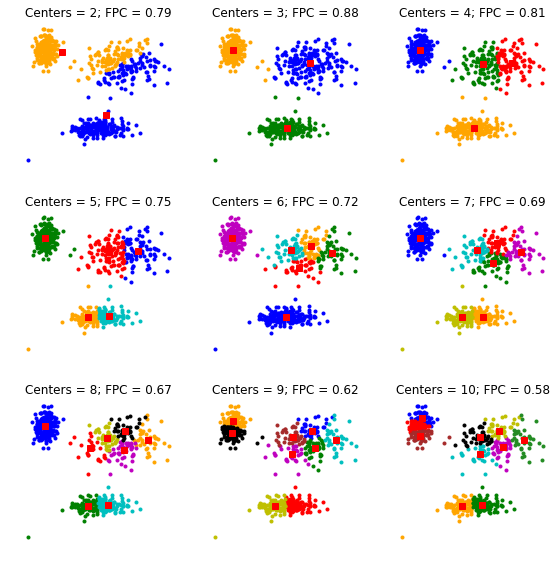

In [4]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

In [8]:
u.shape

(10, 601)

In [23]:
alldata.shape



(2, 601)

Parameters:	
data : 2d array, size (S, N)

Data to be clustered. N is the number of data sets; S is the number of features within each sample vector.
c : int

Desired number of clusters or classes.
m : float

Array exponentiation applied to the membership function u_old at each iteration, where U_new = u_old ** m.
error : float

Stopping criterion; stop early if the norm of (u[p] - u[p-1]) < error.
maxiter : int

Maximum number of iterations allowed.
init : 2d array, size (S, N)

Initial fuzzy c-partitioned matrix. If none provided, algorithm is randomly initialized.
seed : int

If provided, sets random seed of init. No effect if init is provided. Mainly for debug/testing purposes.
Returns:	
cntr : 2d array, size (S, c)

Cluster centers. Data for each center along each feature provided for every cluster (of the c requested clusters).
u : 2d array, (S, N)

Final fuzzy c-partitioned matrix.
u0 : 2d array, (S, N)

Initial guess at fuzzy c-partitioned matrix (either provided init or random guess used if init was not provided).
d : 2d array, (S, N)

Final Euclidian distance matrix.
jm : 1d array, length P

Objective function history.
p : int

Number of iterations run.
fpc : float

Final fuzzy partition coefficient.

In [24]:
 cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata,c=3, m= 2, error=0.005, maxiter=1000, init=None)

In [12]:

u


array([[5.87118766e-01, 9.83371089e-01, 9.98501605e-01, ...,
        1.11334334e-02, 4.23864700e-02, 2.73415088e-02],
       [2.34590820e-01, 5.43326887e-03, 5.40450994e-04, ...,
        1.08557376e-02, 6.02084946e-02, 3.43840512e-02],
       [1.78290413e-01, 1.11956419e-02, 9.57943629e-04, ...,
        9.78010829e-01, 8.97405035e-01, 9.38274440e-01]])

In [13]:

# Python3 Program to find 
# covariance of two set. 
import math 
  
# Function to find mean. 
def mean(arr, n): 
      
    sum = 0
    for i in range(0, n): 
        sum = sum + arr[i] 
      
    return sum / n 
  
# Function to find covariance. 
def covariance(arr1, arr2, n): 
  
    sum = 0
    for i in range(0, n): 
        sum = (sum + (arr1[i] - mean(arr1, n)) *
                      (arr2[i] - mean(arr2, n))) 
      
    return sum / (n - 1) 
  
# Driver method 
arr1 = [65.21, 64.75, 65.26, 65.76, 65.96] 
n = len(arr1) 
  
arr2 = [67.25, 66.39, 66.12, 65.70, 66.64] 
m = len(arr2) 
  
if (m == n): 
    print (covariance(arr1, arr2, m)) 
  
# This code is contributed by Gitanjali.

-0.05805000000000284


In [1]:
import numpy as np
from scipy.linalg import norm


class GK:
    def __init__(self, n_clusters=4, max_iter=100, m=2, error=1e-6):
        super().__init__()
        self.u, self.centers, self.f = None, None, None
        self.clusters_count = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.error = error

    def fit(self, z):
        N = z.shape[0]
        C = self.clusters_count
        centers = []

        u = np.random.dirichlet(np.ones(N), size=C)

        iteration = 0
        while iteration < self.max_iter:
            u2 = u.copy()

            centers = self.next_centers(z, u)
            f = self._covariance(z, centers, u)
            dist = self._distance(z, centers, f)
            u = self.next_u(dist)
            iteration += 1

            # Stopping rule
            if norm(u - u2) < self.error:
                break

        self.f = f
        self.u = u
        self.centers = centers
        return centers

    def next_centers(self, z, u):
        um = u ** self.m
        return ((um @ z).T / um.sum(axis=1)).T

    def _covariance(self, z, v, u):
        um = u ** self.m

        denominator = um.sum(axis=1).reshape(-1, 1, 1)
        temp = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        temp = np.matmul(temp, temp.transpose((0, 1, 3, 2)))
        numerator = um.transpose().reshape(um.shape[1], um.shape[0], 1, 1) * temp
        numerator = numerator.sum(0)

        return numerator / denominator

    def _distance(self, z, v, f):
        dif = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        determ = np.power(np.linalg.det(f), 1 / self.m)
        det_time_inv = determ.reshape(-1, 1, 1) * np.linalg.pinv(f)
        temp = np.matmul(dif.transpose((0, 1, 3, 2)), det_time_inv)
        output = np.matmul(temp, dif).squeeze().T
        return np.fmax(output, 1e-8)

    def next_u(self, d):
        power = float(1 / (self.m - 1))
        d = d.transpose()
        denominator_ = d.reshape((d.shape[0], 1, -1)).repeat(d.shape[-1], axis=1)
        denominator_ = np.power(d[:, None, :] / denominator_.transpose((0, 2, 1)), power)
        denominator_ = 1 / denominator_.sum(1)
        denominator_ = denominator_.transpose()

        return denominator_

    def predict(self, z):
        if len(z.shape) == 1:
            z = np.expand_dims(z, axis=0)

        dist = self._distance(z, self.centers, self.f)
        if len(dist.shape) == 1:
            dist = np.expand_dims(dist, axis=0)

        u = self.next_u(dist)
        return np.argmax(u, axis=0)

In [2]:
MAX_ITER = 500
m = 2.00
number_of_clusters = 3
gk = GK(number_of_clusters, MAX_ITER, m)
gk_centers = gk.fit(X)


NameError: name 'X' is not defined

In [4]:
from sklearn.datasets import load_iris

data = load_iris()
X, Y, target_names = data.data, data.target, data.target_names


In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3